<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Comcast Telecom Consumer Complaints ..

**DESCRIPTION**

*Comcast is an American global telecommunication company. The firm has been providing terrible customer service.*

*They continue to fall short despite repeated promises to improve.*

*Only last month (October 2016) the authority fined them a USD 2.3 million, after receiving over 1000 consumer complaints.*

*The existing database will serve as a repository of public customer complaints filed against Comcast.*

*It will help to pin down what is wrong with Comcast's customer service.*


**Data Dictionary**

*Ticket #: Ticket number assigned to each complaint*

*Customer Complaint: Description of complaint*

*Date: Date of complaint*

*Time: Time of complaint*

*Received Via: Mode of communication of the complaint*

*City: Customer city*

*State: Customer state*

*Zipcode: Customer zip*

*Status: Status of complaint*

*Filing on behalf of someone*





* * *

#### 1. Load the data :

#### Import all required libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

#### Read the “housing.csv” file from the folder into the program.

In [205]:
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")
df_comcast=pd.read_csv(r'./Comcast_telecom_complaints_data.csv',parse_dates=['Date_month_year'],date_parser=mydateparser)
print(df_comcast.shape)
df_comcast.columns

(2224, 11)


<ipython-input-205-fb4fe5a1192a>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")


Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

#### Print first few rows of this data.

In [206]:
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


#### Check datatypes

In [207]:
df_comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

#### Check high level statistical data for the dataframe

In [208]:
df_comcast.describe(include='all')

<ipython-input-208-d776ff869e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comcast.describe(include='all')


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,338831,Comcast,24-06-15,2015-06-24 00:00:00,8:24:30 AM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
first,NaN,NaN,NaN,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN


In [209]:
df_comcast['Date']= pd.to_datetime(df_comcast['Date'],format='%d-%m-%y')
df_comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [210]:
df_comcast.describe(include='all')

<ipython-input-210-d776ff869e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comcast.describe(include='all')
<ipython-input-210-d776ff869e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comcast.describe(include='all')


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,338831,Comcast,2015-06-24 00:00:00,2015-06-24 00:00:00,8:24:30 AM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
first,NaN,NaN,2015-01-04 00:00:00,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-12-06 00:00:00,2015-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN


#### Null value checking

In [211]:
df_comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

#### Unique Value Check for the features which shows uniqueness from the results of describe all

In [212]:
df_comcast['Date_month_year'].unique()

array(['2015-04-22T00:00:00.000000000', '2015-08-04T00:00:00.000000000',
       '2015-04-18T00:00:00.000000000', '2015-07-05T00:00:00.000000000',
       '2015-05-26T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
       '2015-06-24T00:00:00.000000000', '2015-06-23T00:00:00.000000000',
       '2015-01-06T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-04-24T00:00:00.000000000', '2015-06-05T00:00:00.000000000',
       '2015-06-13T00:00:00.000000000', '2015-06-30T00:00:00.000000000',
       '2015-06-27T00:00:00.000000000', '2015-04-16T00:00:00.000000000',
       '2015-11-04T00:00:00.000000000', '2015-02-06T00:00:00.000000000',
       '2015-07-06T00:00:00.000000000', '2015-08-06T00:00:00.000000000',
       '2015-02-05T00:00:00.000000000', '2015-06-22T00:00:00.000000000',
       '2015-04-28T00:00:00.000000000', '2015-05-24T00:00:00.000000000',
       '2015-04-29T00:00:00.000000000', '2015-05-19T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-05-06

In [286]:
np.set_printoptions(linewidth=100,edgeitems=12)
df_comcast['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds', 'Payment disappear - service got disconnected',
       'Speed and Service', 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
       'Comcast not working and no service to boot',
       'ISP Charging for arbitrary data limits with overage fees',
       'Throttling service and unreasonable data caps',
       'Comcast refuses to help troubleshoot and correct my service.', 'Comcast extended outages',
       'Comcast Raising Prices and Not Being Available To Ask Why',
       'Billing after service was asked to be disconnected',
       'YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE', ..., 'Internet Services',
       'i had sent out a check payment comcast', 'Comcast Internet Service quality',
       'Comcast unfair pricing', 'High Internet & Cable Bill', 'problems with internet service',
       'Speed throttling, speeds not at promised output', 'Service Availability',
       'Comcast Monthly Billing for Returned Modem', 'complaint a

In [213]:
df_comcast['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [192]:
df_comcast['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [345]:
#df_comcast['City'].unique()

In [215]:
df_comcast['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

#### Replacing duplicate state with typo for District Of Columbia

In [216]:
df_comcast['State'].replace({'District Of Columbia':'District of Columbia'},inplace=True)
df_comcast['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District of Columbia', 'Iowa'], dtype=object)

In [217]:
df_comcast['Filing on Behalf of Someone'].unique()

array(['No', 'Yes'], dtype=object)

In [218]:
df_comcast['Date'].min()


Timestamp('2015-01-04 00:00:00')

In [219]:
df_comcast['Date'].max()

Timestamp('2015-12-06 00:00:00')

In [220]:
df_comcast['Date'].max()-df_comcast['Date'].min()

Timedelta('336 days 00:00:00')

In [222]:
df_comcast['Month']=df_comcast['Date'].dt.month
df_comcast['Year']=df_comcast['Date'].dt.year
df_comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Year
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,2015
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,2015
2221,331188,complaint about comcast,2015-09-06,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,2015
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,2015


In [223]:
df_comcast=df_comcast.set_index('Date')
df_comcast.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Year
Date,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015
2015-08-04,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,2015
2015-04-18,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,2015
2015-05-26,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015


#### Provide the trend chart for the number of complaints at daily granularity levels.

Text(0, 0.5, 'Daily Customer Complaint')

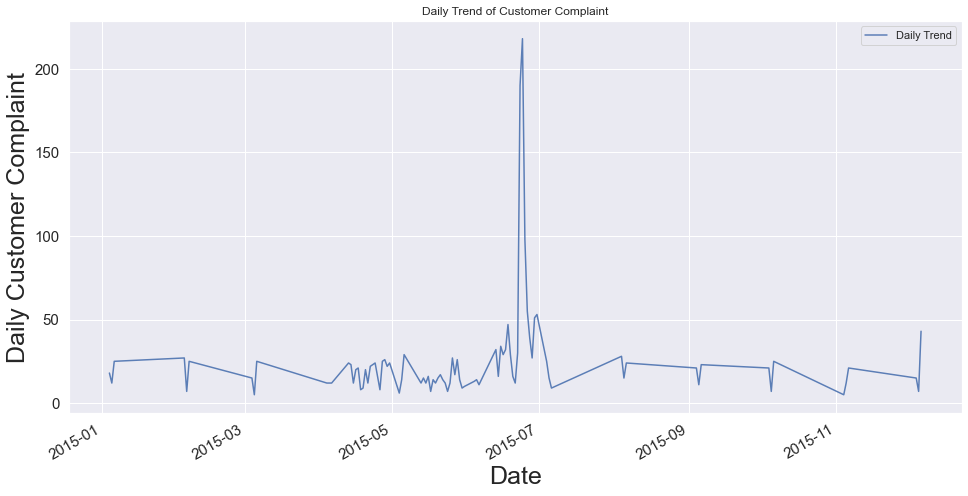

In [277]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 8)})
ax=df_comcast['Date_month_year'].value_counts().sort_index().plot(x='Date',y='Daily Ticket Volume',
                                                               title='Daily Trend of Customer Complaint',
                                                               alpha=.9,linewidth=1.5,legend=True,label='Daily Trend',
                                                                  fontsize=15);
ax.set_xlabel("Date", fontsize=25)
ax.set_ylabel("Daily Customer Complaint",fontsize=25)


#### Provide the trend chart for the number of complaints at monthly granularity levels.


Text(0, 0.5, 'Monthly Customer Complaint')

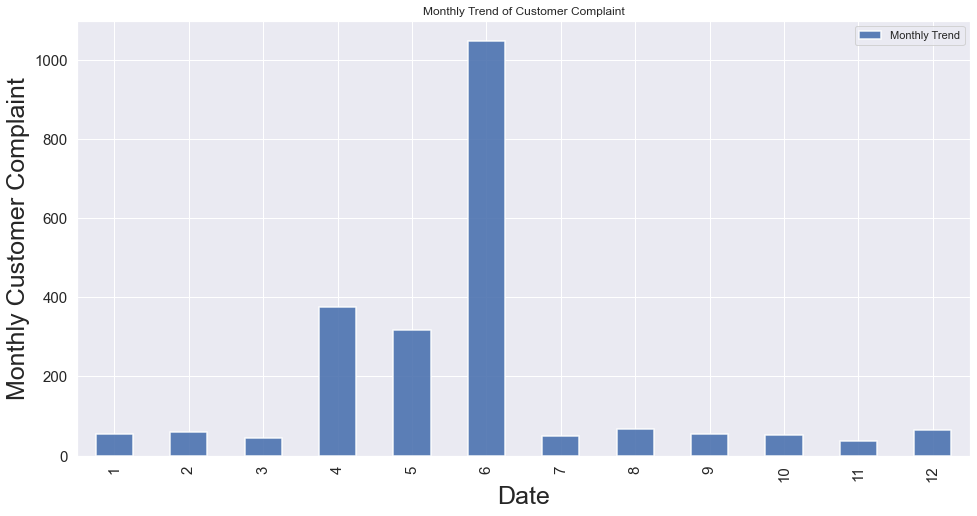

In [278]:
df_comcast['Month'].sort_index(inplace=True)
ax=df_comcast['Month'].value_counts().sort_index().plot(kind='bar',title='Monthly Trend of Customer Complaint',
                                                     alpha=.9,linewidth=1.5,legend=True,label='Monthly Trend',
                                                    fontsize=15);
ax.set_xlabel("Date", fontsize=25)
ax.set_ylabel("Monthly Customer Complaint",fontsize=25)

#### Provide a table with the frequency of complaint types.



In [290]:
df_comcast['Customer Complaint'].value_counts()

Comcast                                           83
Comcast Internet                                  18
Comcast Data Cap                                  17
comcast                                           13
Data Caps                                         11
                                                  ..
Comcast.net                                        1
Issues with service and payments                   1
Comcast Refund and discontinue Service billing     1
Comcast Price Gouging                              1
COMCAST MISSES 4 APPOINTMENTS                      1
Name: Customer Complaint, Length: 1841, dtype: int64

In [280]:
df_comcast['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [281]:
df_comcast['Filing on Behalf of Someone'].value_counts()

No     2021
Yes     203
Name: Filing on Behalf of Someone, dtype: int64

#### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


*Comcast complaint types are maximum with 96 complaints under this type.*
*Comcast Data Cap 28,Comcast Internet has 18 complaints*
*As we can visually see that comcast and Comcast are same, also Data Caps and Comcast Data Cap are same*
*So replacing these similar complaint type with single strings for each type.

In [292]:
df_comcast['Customer Complaint'].replace({'comcast':'Comcast'},inplace=True)
df_comcast['Customer Complaint'].replace({'Data Caps':'Comcast Data Cap'},inplace=True)
df_comcast['Customer Complaint'].value_counts()

Comcast                                           96
Comcast Data Cap                                  28
Comcast Internet                                  18
Comcast Billing                                   11
Comcast Data Caps                                 11
                                                  ..
Comcast.net                                        1
Issues with service and payments                   1
Comcast Refund and discontinue Service billing     1
Comcast Price Gouging                              1
COMCAST MISSES 4 APPOINTMENTS                      1
Name: Customer Complaint, Length: 1839, dtype: int64

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


In [300]:
df_comcast['Status Change'] = df_comcast['Status']
df_comcast['Status Change'].replace({'Pending':'Open'},inplace=True)
df_comcast['Status Change'].replace({'Solved':'Closed'},inplace=True)
#df_comcast['Status'].unique()
df_comcast['Status Change'].unique()

array(['Closed', 'Open'], dtype=object)

#### Validate with count of status

In [301]:
df_comcast['Status Change'].value_counts()

Closed    1707
Open       517
Name: Status Change, dtype: int64

#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:



In [318]:
state_wise_pivot=pd.pivot_table(df_comcast,index='State',columns='Status Change',values='City',aggfunc='count')
state_wise_pivot.isnull().sum()

Status Change
Closed    0
Open      8
dtype: int64

In [319]:
state_wise_pivot['Open'].fillna(0,inplace=True)
state_wise_pivot.isnull().sum()
state_wise_pivot

Status Change,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District of Columbia,15.0,2.0
Florida,201.0,39.0


In [320]:
state_wise_pivot.columns

Index(['Closed', 'Open'], dtype='object', name='Status Change')

<AxesSubplot:xlabel='State'>

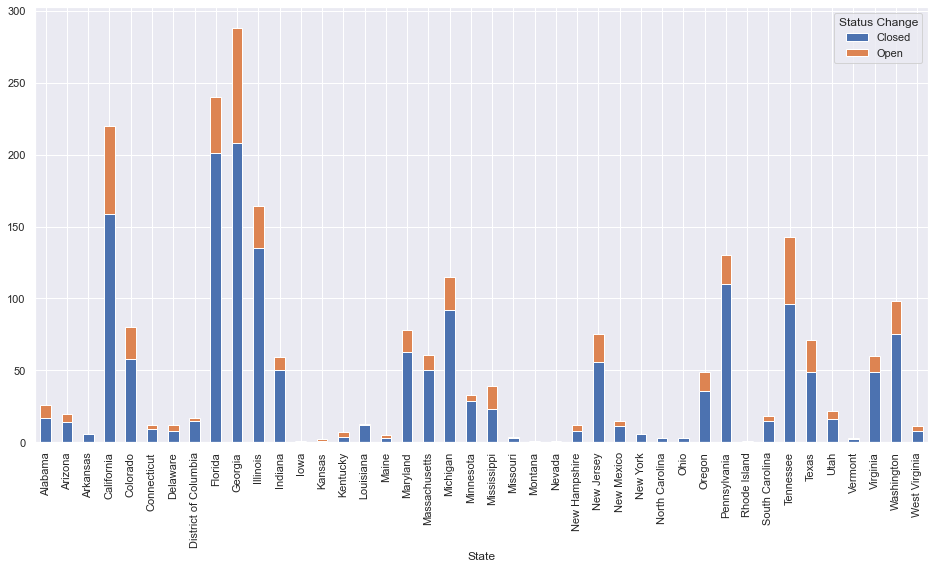

In [321]:
state_wise_pivot.plot(kind='bar',stacked=True,figsize=(16,8))

#### Which state has the maximum complaints



In [332]:
state_wise_pivot['Total']=state_wise_pivot['Open']+state_wise_pivot['Closed']
state_wise_pivot['Total'].idxmax()

'Georgia'

#### Which state has the highest percentage of unresolved complaints



In [336]:
state_wise_pivot['percentage_open']=(state_wise_pivot['Open']/state_wise_pivot['Total'])*100
state_wise_pivot['percentage_open'].idxmax()

'Kansas'

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [339]:
complaint_received_mode_pivot=pd.pivot_table(df_comcast,index='Received Via',columns='Status Change',values='Ticket #',aggfunc='count')
complaint_received_mode_pivot.isnull().sum()

Status Change
Closed    0
Open      0
dtype: int64

In [340]:
complaint_received_mode_pivot

Status Change,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [344]:
complaint_received_mode_pivot['resolved_complaint_percentage']=(complaint_received_mode_pivot['Closed']/(complaint_received_mode_pivot['Closed']
                                                                                                         +complaint_received_mode_pivot['Open']))*100
complaint_received_mode_pivot

Status Change,Closed,Open,resolved_complaint_percentage
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
